In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt   
import matplotlib.style
from warnings import filterwarnings
filterwarnings('ignore')

#Ans 1

##Ans 1.1

In [ ]:
Path=('/content/drive/MyDrive/Election_Data.xlsx')
DF= pd.read_excel(Path)

In [ ]:
DF.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [ ]:
DF.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [ ]:
# Removing the Unnamed column as it is not necessary for our analysis
DF.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
DF.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [ ]:
DF.shape

(1525, 9)

In [ ]:
dups = DF.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

DF[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [ ]:
DF.drop_duplicates(inplace=True)

In [ ]:
DF.shape

(1517, 9)

In [ ]:
dups = DF.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

DF[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [ ]:
cat=[]
num=[]
for i in DF.columns:
    if DF[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [ ]:
DF['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [ ]:
DF['gender'].value_counts()

female    808
male      709
Name: gender, dtype: int64

In [ ]:
DF.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

###From the above analysis I can see that- 
* The dataset originally had 1529 rows and 10 columns.
* There was a column named Unnamed which was unnecessary so I have dropped that.
* There are 2 columns which are categorical types and 7 columns are present in this dataset which are numeric variables.
* There is no null value present in the Dataset. 
* There are 8 duplicate rows present in the Dataset.
* After dropping the duplicate rows and unwanted column there are 1517 rows and 9 columns now in the dataset.

##Ans 1.2

###Univariate Analysis

###Numerical Variables

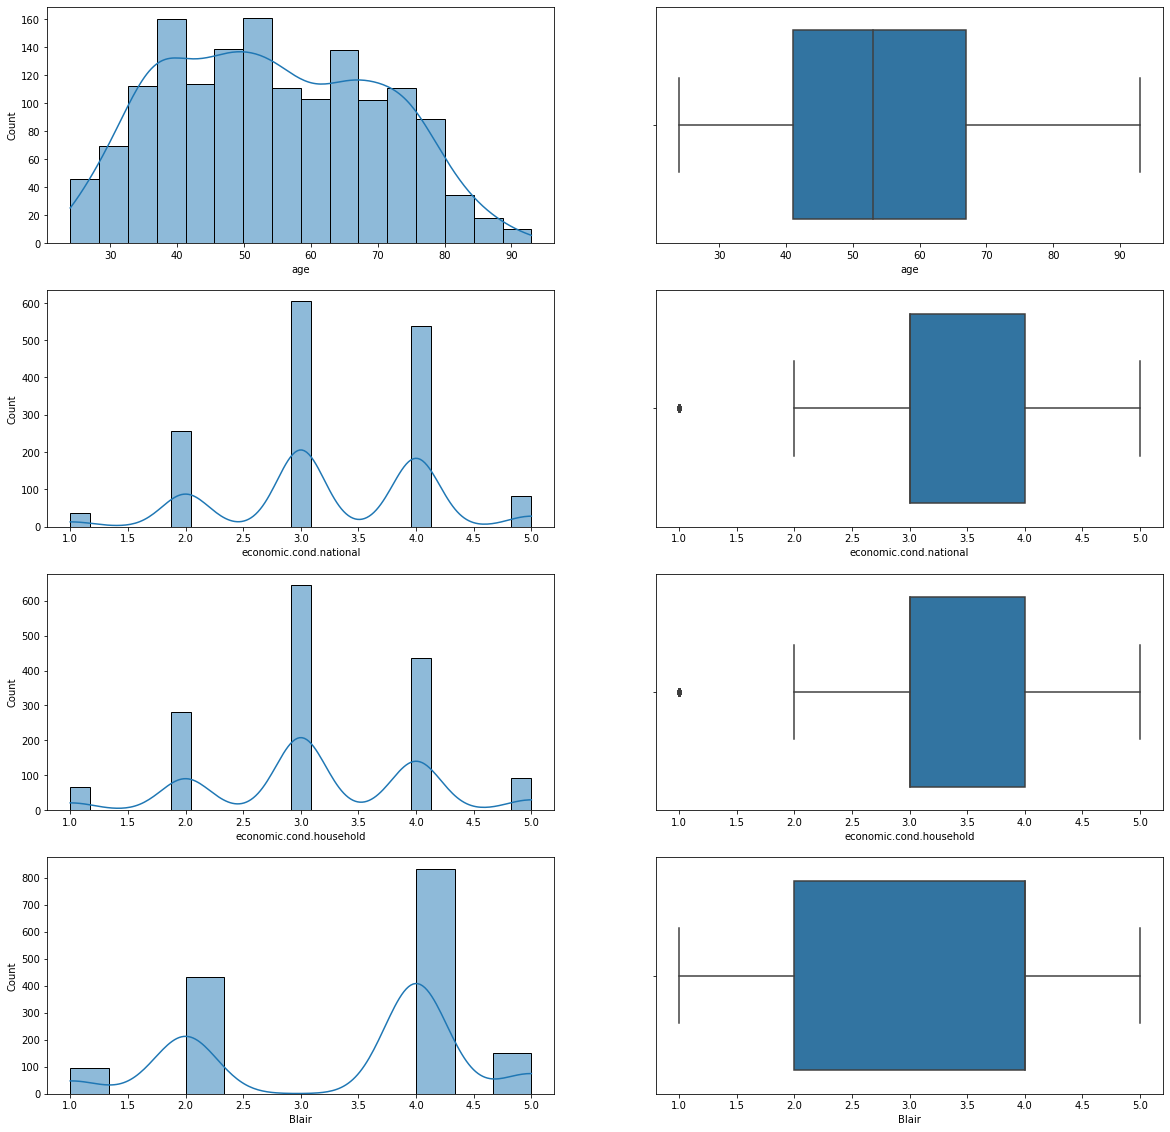

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20)
sns.histplot(DF['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=DF, ax=axes[0][1])
sns.histplot(DF['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=DF , ax=axes[1][1])
sns.histplot(DF['economic.cond.household'] , kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=DF , ax=axes[2][1])
sns.histplot(DF['Blair'], kde=True, ax=axes[3][0])
sns.boxplot(x='Blair', data=DF, ax=axes[3][1])
plt.show()

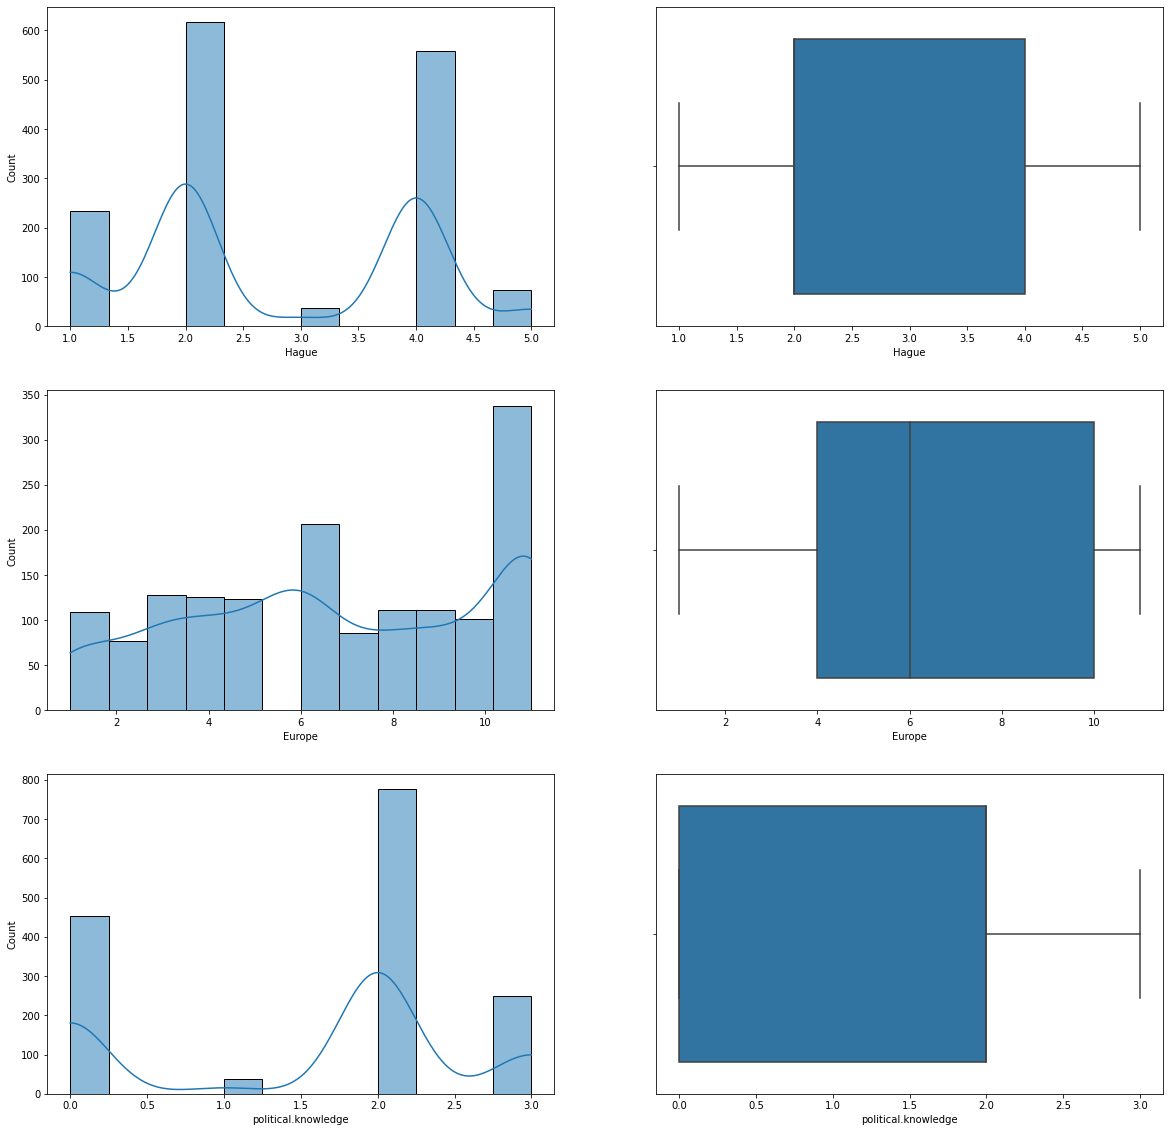

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,20)
sns.histplot(DF['Hague'], kde=True, ax=axes[0][0])
sns.boxplot(x='Hague', data=DF, ax=axes[0][1])
sns.histplot(DF['Europe'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Europe', data=DF , ax=axes[1][1])
sns.histplot(DF['political.knowledge'] , kde=True, ax=axes[2][0])
sns.boxplot(x='political.knowledge', data=DF , ax=axes[2][1])
plt.show()

###From the above visualization and analysis the data I can see that for

* age - Data is normally distributed and the mean and median are almost same. The mean for age is 54.18 and the median is 53. The minimum age of the labour leader is 24 and the maximum age of the labour leader is 93. No outlier is detected.

* economic.cond.national- Data is normally distributed and the mean and median are almost same. The mean is 3.25 and the median is 3. Assessment of current national economic conditions lies from 1 to 5. One outlier is detected.

* economic.cond.household- Data is normally distributed and the mean and median are almost same. The mean is 3.14 and the median is 3. Assessment of current household economic conditions lies from 1 to 5. One outlier is detected.

* Blair- Data is normally distributed and the mean and median are almost same. The mean is 3.33 and the median is 4. Assessment of the Labour leader lies from 1 to 5. No outlier is detected.

* Hague- Data is normally distributed and the mean and median are almost same. The mean is 2.74 and the median is 2.  Assessment of the Conservative leader lies from 1 to 5. No outlier is detected.

* Europe - Data is normally distributed and the mean and median are almost same. The mean is 6.72 and the median is 6. The rating of respondents' attitudes toward European integration lies from 1 to 11. No outlier is detected.

* political.knowledge- Data is normally distributed and the mean and median are almost same. There is no left skew. The mean is 1.54 and the median is 2. The rating of knowledge of parties' positions on European integration lies from 0 to 3. No outlier is detected.

###Categorical Variables

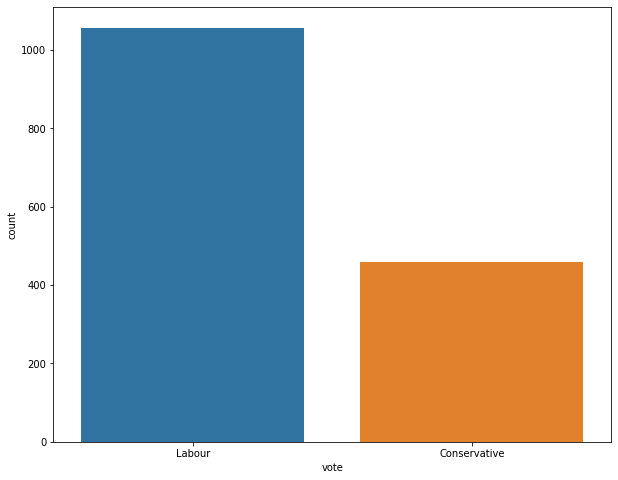

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(DF['vote']);

###From the visualization of categorical variable 'age' I can see that there are two parties, Labour and Conservative. As per the survey 1057 votes will go to the party Labour and 460 to the Conservative.

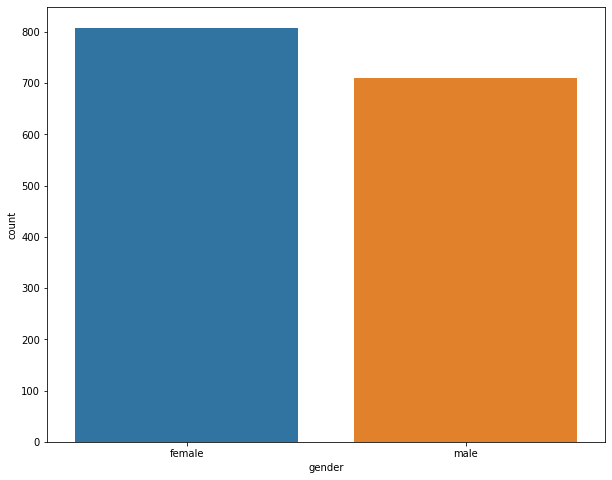

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(DF['gender']);

###From the visualization of categorical variable 'gender' I can see that the female voters are more in number than the male voters.

###Bivariate Analysis

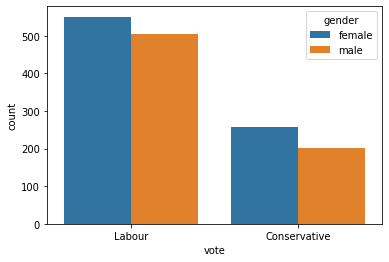

In [ ]:
sns.countplot(x='vote', hue='gender', data=DF)
plt.show()

###From the above visualization I can see the concentrations of votes both party has got on the basis voters' genders. 

###Multivariate Analysis

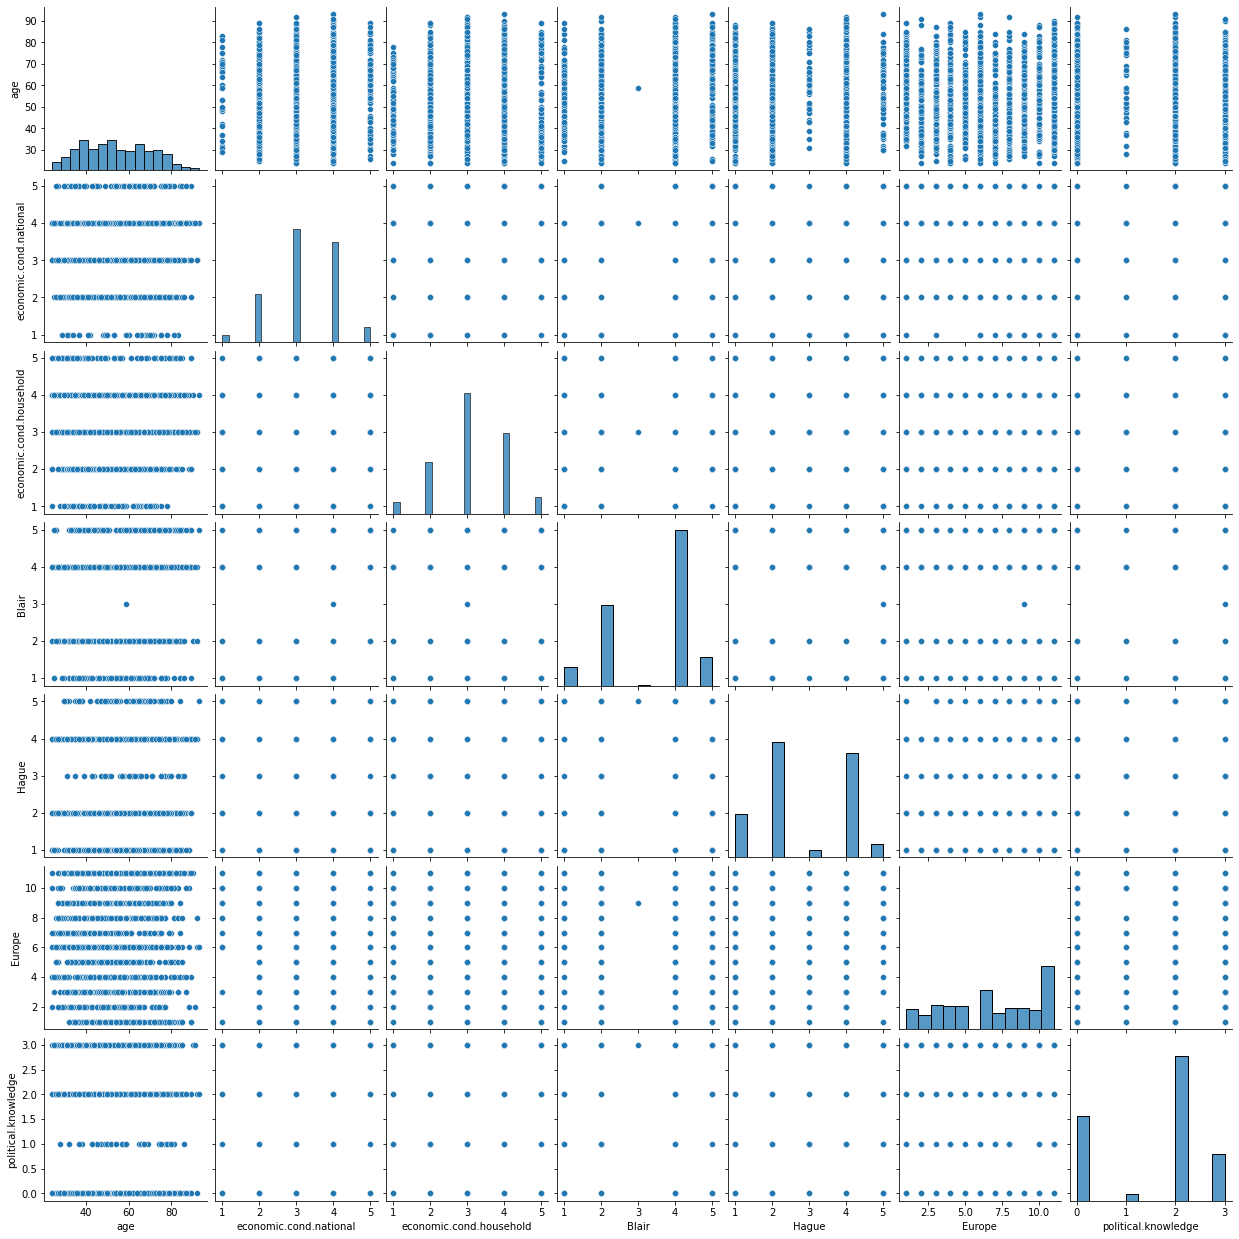

In [ ]:
sns.pairplot(DF)
plt.show()

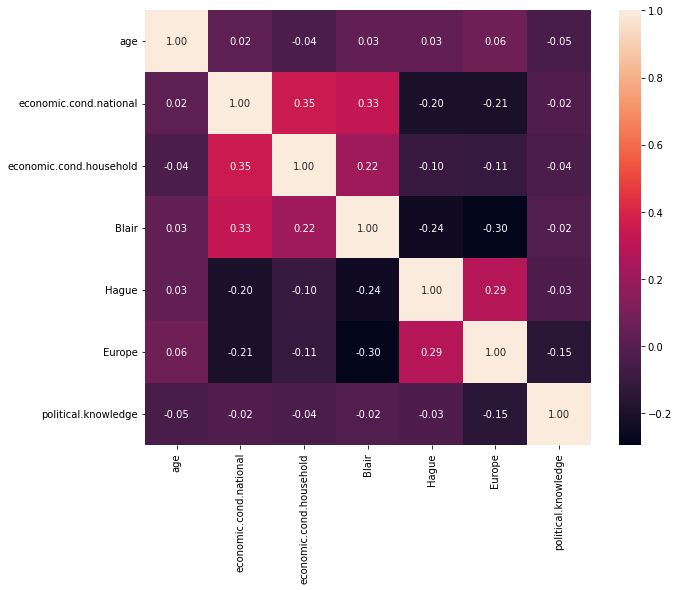

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(DF.corr(),annot=True,fmt=".2f");

###From the above visualizations using pair plot and heatmap also I can clearly see that there is no correlation present between the variables.

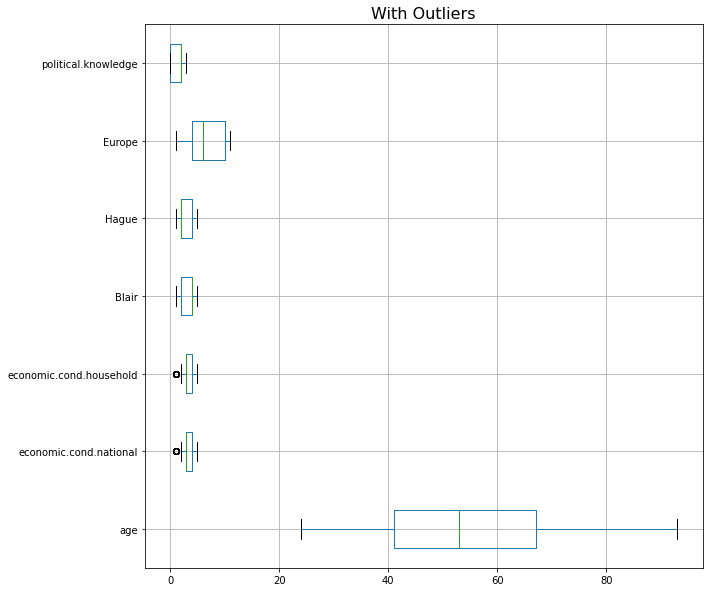

In [ ]:
#Outliers Check
cont=DF.dtypes[(DF.dtypes!='uint8') & (DF.dtypes!='bool')].index
plt.figure(figsize=(10,10))
DF[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

###As I have already seen during Univariate analysis and here also I can see that only for economic.cond.household and economic.cond.national there is one outlier in left skew in both case.
###But as the variables are ordinal and there are a few outliers so I am not removing them.

##Ans 1.3

###I will encode the categorical variables vote and gender. Below is the encoding for ordinal values:

vote: Conservative = 1, Labour = 0

gender: female = 1, male = 0

In [ ]:
DF['vote'].replace(to_replace='Conservative', value=1, inplace=True)
DF['vote'].replace(to_replace='Labour', value=0, inplace=True)

In [ ]:
DF['gender'].replace(to_replace='female', value=1, inplace=True)
DF['gender'].replace(to_replace='male', value=0, inplace=True)

In [ ]:
DF.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,1
1,0,36,4,4,4,4,5,2,0
2,0,35,4,4,5,2,3,2,0
3,0,24,4,2,2,1,4,0,1
4,0,41,2,2,1,1,6,2,0


###Here I am scaling the variables as continuous variables have different weightage using min-max technique.

In [ ]:
cat=[]
num=[]
for i in DF.columns:
    if DF[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

[]
['vote', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']


In [ ]:
num1=['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
### removing the target variable

In [ ]:
DF[num1] = DF[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [ ]:
## Check if the variables have been scaled or not
DF.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,1.0
1,0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,0.0
2,0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,0.0
3,0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,1.0
4,0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,0.0


###Train and Test Split

In [ ]:
# Copy all the predictor variables into X dataframe
X = DF.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = DF['vote']

In [ ]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,1.0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,0.0
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,0.0
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,1.0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,0.0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: vote, dtype: int64

In [ ]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

##Ans 1.4

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_Model= LogisticRegression()
LR_Model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_score = LR_Model.score(X_train, y_train)
model_score

0.8341187558906692

###Linear Discriminant Analysis(LDA) algorithm

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
Lda_Model = LinearDiscriminantAnalysis()
Lda_Model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
model_score = Lda_Model.score(X_train, y_train)
model_score

0.8341187558906692

##Ans 1.5

###KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_Model=KNeighborsClassifier()
KNN_Model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
model_score = KNN_Model.score(X_train, y_train)
model_score

0.8557964184731386

###Naïve Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB_Model = GaussianNB()
NB_Model.fit(X_train, y_train)

GaussianNB()

In [ ]:
model_score = NB_Model.score(X_train, y_train)
model_score

0.8350612629594723

##Ans 1.6

###Model Tuning

###Tuned Logistic Regression

In [ ]:
param_grid = {
    'penalty':['l2','l1','elasticnet'],
    'tol':[0.0001,0.01,],
    'random_state':[0,1,2],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']    
}

clf = LogisticRegression()

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [0, 1, 2],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.01]})

In [ ]:
grid_search.best_params_

{'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.0001}

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
model_score = best_grid.score(X_train, y_train)
model_score

0.8350612629594723

###Tuned LDA

In [ ]:
param_grid = {
    'tol':[0.0001,0.01,0.001,0.000000001],
    'solver':['svd', 'lsqr', 'eigen']    
}

clf1 = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = clf1, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.01, 0.001, 1e-09]})

In [ ]:
grid_search.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [ ]:
best_grid1 = grid_search.best_estimator_

In [ ]:
model_score = best_grid1.score(X_train, y_train)
model_score

0.8341187558906692

###Tuned KNN

In [ ]:
param_grid = {
    'weights':['uniform', 'distance'],
    'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[30,45,50],
    'p':[2,1]
}
clf3 = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = clf3, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 45, 50], 'p': [2, 1],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'p': 2, 'weights': 'uniform'}

In [ ]:
best_grid2 = grid_search.best_estimator_

In [ ]:
model_score = best_grid2.score(X_train, y_train)
model_score

0.8557964184731386

###Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Bagging_Model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_Model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [ ]:
model_score = Bagging_Model.score(X_train, y_train)
model_score

0.9660697455230914

###Boosting

###Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADB_Model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_Model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
model_score = ADB_Model.score(X_train, y_train)
model_score

0.8501413760603205

###Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_Model = GradientBoostingClassifier(random_state=1)
GB_Model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
model_score = GB_Model.score(X_train, y_train)
model_score

0.8925541941564562

##Ans 1.7

###Performance Metrics for Logistic Regression Model

In [ ]:
y_train_predict = LR_Model.predict(X_train)
y_test_predict = LR_Model.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[692  62]
 [114 193]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       754
           1       0.76      0.63      0.69       307

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[269  34]
 [ 45 108]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       303
           1       0.76      0.71      0.73       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



      Conservative    Labour
0         0.092416  0.907584
1         0.884658  0.115342
2         0.688330  0.311670
3         0.874177  0.125823
4         0.973810  0.026190
...            ...       ...
1056      0.944016  0.055984
1057      0.639340  0.360660
1058      0.729095  0.270905
1059      0.745989  0.254011
1060      0.971782  0.028218

[1061 rows x 2 columns]
AUC 0.890:


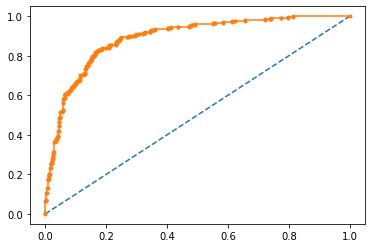

In [ ]:
# AUC and ROC for the training data

trainprobs=LR_Model.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.884


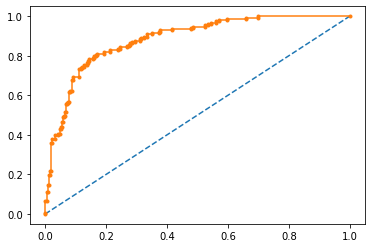

In [ ]:
# AUC and ROC for the testing data

testprobs=LR_Model.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for Linear Discriminant Analysis Model

In [ ]:
y_train_predict = Lda_Model.predict(X_train)
y_test_predict = Lda_Model.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[685  69]
 [107 200]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[269  34]
 [ 42 111]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



      Conservative    Labour
0         0.050784  0.949216
1         0.921759  0.078241
2         0.692611  0.307389
3         0.921037  0.078963
4         0.987839  0.012161
...            ...       ...
1056      0.967431  0.032569
1057      0.631676  0.368324
1058      0.779112  0.220888
1059      0.791611  0.208389
1060      0.981132  0.018868

[1061 rows x 2 columns]
AUC 0.889:


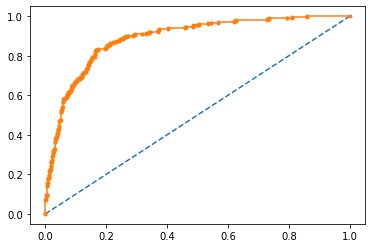

In [ ]:
# AUC and ROC for the training data

trainprobs=Lda_Model.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.888


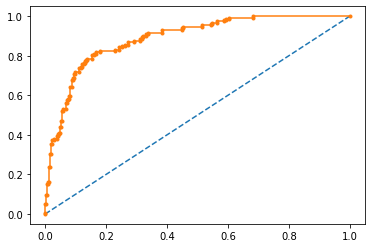

In [ ]:
# AUC and ROC for the testing data

testprobs=Lda_Model.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for KNN Model

In [ ]:
y_train_predict = KNN_Model.predict(X_train)
y_test_predict = KNN_Model.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[687  67]
 [ 86 221]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       754
           1       0.77      0.72      0.74       307

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[266  37]
 [ 46 107]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       303
           1       0.74      0.70      0.72       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



      Conservative  Labour
0              0.0     1.0
1              0.8     0.2
2              0.6     0.4
3              1.0     0.0
4              1.0     0.0
...            ...     ...
1056           1.0     0.0
1057           0.2     0.8
1058           0.6     0.4
1059           0.6     0.4
1060           1.0     0.0

[1061 rows x 2 columns]
AUC 0.930:


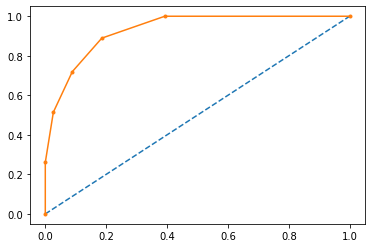

In [ ]:
# AUC and ROC for the training data

trainprobs=KNN_Model.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.873


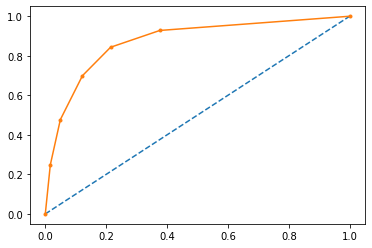

In [ ]:
# AUC and ROC for the testing data

testprobs=KNN_Model.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for Naive Bayes Model

In [ ]:
y_train_predict = NB_Model.predict(X_train)
y_test_predict = NB_Model.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[675  79]
 [ 96 211]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[263  40]
 [ 41 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



      Conservative    Labour
0         0.015322  0.984678
1         0.934563  0.065437
2         0.728265  0.271735
3         0.919974  0.080026
4         0.992352  0.007648
...            ...       ...
1056      0.981285  0.018715
1057      0.573086  0.426914
1058      0.796009  0.203991
1059      0.680974  0.319026
1060      0.998151  0.001849

[1061 rows x 2 columns]
AUC 0.888:


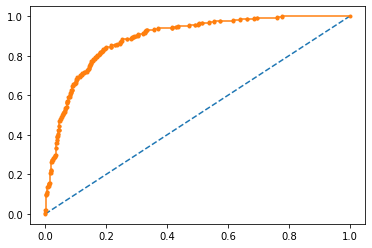

In [ ]:
# AUC and ROC for the training data

trainprobs=NB_Model.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.876


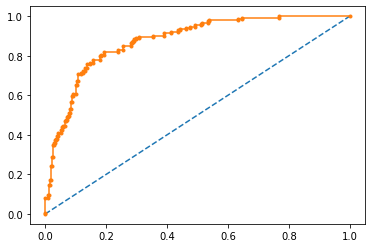

In [ ]:
# AUC and ROC for the testing data

testprobs=NB_Model.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for Tuned Logistic Regression Model

In [ ]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[692  62]
 [113 194]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       754
           1       0.76      0.63      0.69       307

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[267  36]
 [ 43 110]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.72      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



      Conservative    Labour
0         0.074734  0.925266
1         0.886500  0.113500
2         0.711217  0.288783
3         0.874748  0.125252
4         0.977996  0.022004
...            ...       ...
1056      0.950529  0.049471
1057      0.633864  0.366136
1058      0.752445  0.247555
1059      0.733723  0.266277
1060      0.971637  0.028363

[1061 rows x 2 columns]
AUC 0.890:


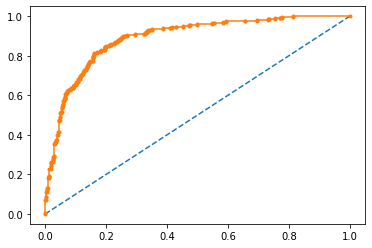

In [ ]:
# AUC and ROC for the training data

trainprobs=best_grid.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.882


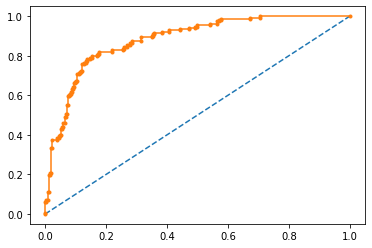

In [ ]:
# AUC and ROC for the testing data

testprobs=best_grid.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for Tuned Linear Discriminant Analysis Model

In [ ]:
y_train_predict = best_grid1.predict(X_train)
y_test_predict = best_grid1.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[685  69]
 [107 200]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[269  34]
 [ 42 111]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



      Conservative    Labour
0         0.050784  0.949216
1         0.921759  0.078241
2         0.692611  0.307389
3         0.921037  0.078963
4         0.987839  0.012161
...            ...       ...
1056      0.967431  0.032569
1057      0.631676  0.368324
1058      0.779112  0.220888
1059      0.791611  0.208389
1060      0.981132  0.018868

[1061 rows x 2 columns]
AUC 0.889:


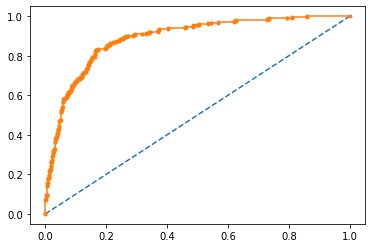

In [ ]:
# AUC and ROC for the training data

trainprobs=best_grid1.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.888


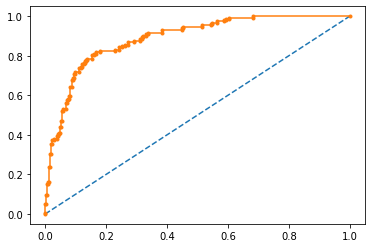

In [ ]:
# AUC and ROC for the testing data

testprobs=best_grid1.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for Tuned KNN Model

In [ ]:
y_train_predict = best_grid2.predict(X_train)
y_test_predict = best_grid2.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[687  67]
 [ 86 221]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       754
           1       0.77      0.72      0.74       307

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[266  37]
 [ 46 107]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       303
           1       0.74      0.70      0.72       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



      Conservative  Labour
0              0.0     1.0
1              0.8     0.2
2              0.6     0.4
3              1.0     0.0
4              1.0     0.0
...            ...     ...
1056           1.0     0.0
1057           0.2     0.8
1058           0.6     0.4
1059           0.6     0.4
1060           1.0     0.0

[1061 rows x 2 columns]
AUC 0.930:


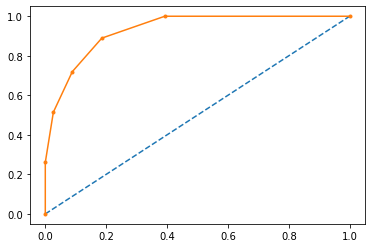

In [ ]:
# AUC and ROC for the training data

trainprobs=best_grid2.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.873


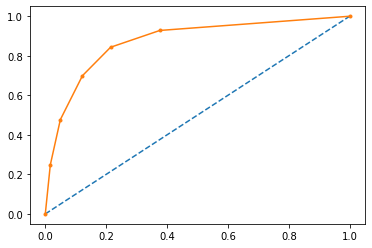

In [ ]:
# AUC and ROC for the testing data

testprobs=best_grid2.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for Bagging Model

In [ ]:
y_train_predict = Bagging_Model.predict(X_train)
y_test_predict = Bagging_Model.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[748   6]
 [ 30 277]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       754
           1       0.98      0.90      0.94       307

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[274  29]
 [ 50 103]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       303
           1       0.78      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



      Conservative  Labour
0           0.0936  0.9064
1           0.8620  0.1380
2           0.4131  0.5869
3           0.9573  0.0427
4           0.9698  0.0302
...            ...     ...
1056        0.9962  0.0038
1057        0.2285  0.7715
1058        0.8689  0.1311
1059        0.8574  0.1426
1060        0.9389  0.0611

[1061 rows x 2 columns]
AUC 0.997:


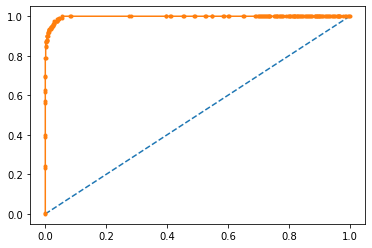

In [ ]:
# AUC and ROC for the training data

trainprobs=Bagging_Model.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.896


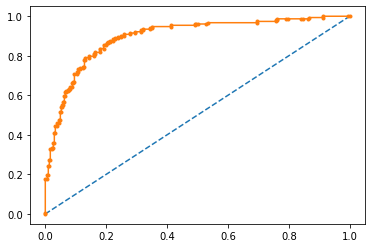

In [ ]:
# AUC and ROC for the testing data

testprobs=Bagging_Model.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for Adaptive Boosting Model

In [ ]:
y_train_predict = ADB_Model.predict(X_train)
y_test_predict = ADB_Model.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[688  66]
 [ 93 214]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.76      0.70      0.73       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[268  35]
 [ 50 103]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.67      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



      Conservative    Labour
0         0.498848  0.501152
1         0.506762  0.493238
2         0.502894  0.497106
3         0.507595  0.492405
4         0.508910  0.491090
...            ...       ...
1056      0.509783  0.490217
1057      0.500840  0.499160
1058      0.511227  0.488773
1059      0.506614  0.493386
1060      0.510767  0.489233

[1061 rows x 2 columns]
AUC 0.915:


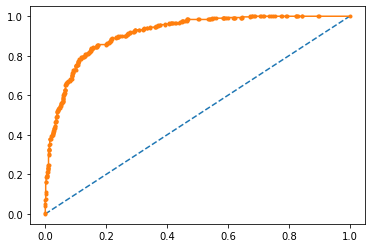

In [ ]:
# AUC and ROC for the training data

trainprobs=ADB_Model.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.877


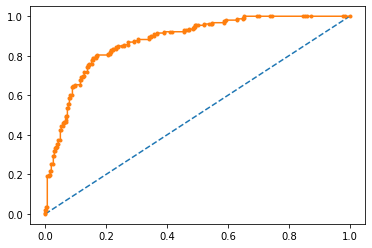

In [ ]:
# AUC and ROC for the testing data

testprobs=ADB_Model.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Performance Metrics for Gradient Boosting Model

In [ ]:
y_train_predict = GB_Model.predict(X_train)
y_test_predict = GB_Model.predict(X_test)

In [ ]:
##train data set
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[708  46]
 [ 68 239]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [ ]:
##test data set
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[276  27]
 [ 49 104]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.79      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



      Conservative    Labour
0         0.166330  0.833670
1         0.928095  0.071905
2         0.664426  0.335574
3         0.950106  0.049894
4         0.968959  0.031041
...            ...       ...
1056      0.976890  0.023110
1057      0.408415  0.591585
1058      0.973513  0.026487
1059      0.886616  0.113384
1060      0.992756  0.007244

[1061 rows x 2 columns]
AUC 0.951:


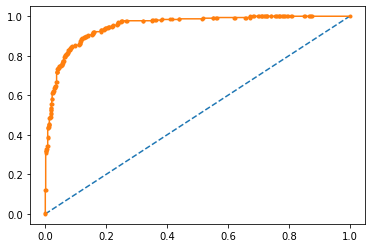

In [ ]:
# AUC and ROC for the training data

trainprobs=GB_Model.predict_proba(X_train)
print(pd.DataFrame(trainprobs,columns=['Conservative','Labour']))
trainprobs=trainprobs[:,1]
auc=roc_auc_score(y_train,trainprobs)
print('AUC %.3f:'%auc)
fpr,tpr,thresholds=roc_curve(y_train,trainprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

AUC Score : 0.898


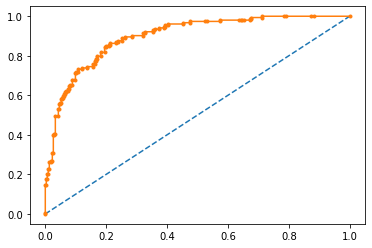

In [ ]:
# AUC and ROC for the testing data

testprobs=GB_Model.predict_proba(X_test)
testprobs=testprobs[:,1]
auc=roc_auc_score(y_test,testprobs)
print("AUC Score : %.3f"%auc)
fpr,tpr,thresholds=roc_curve(y_test,testprobs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

###Comparing the models

###Here in 'vote' variable I have considered Conservative = 1 and Labour = 0. For the comparison I am taking the metric values for 1 just to identify the best model.

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[0.83,0.890,0.63,0.76,0.69],     
        'LR Test':[0.83,0.884,0.71,0.76,0.73],
        'LDA Train':[0.83,0.889,0.65,0.74,0.69],
        'LDA Test':[0.83,0.888,0.73,0.77,0.74],
        'KNN Train':[0.86,0.930,0.72,0.77,0.74],
        'KNN Test':[0.82,0.873,0.70,0.74,0.72],
        'NB Train':[0.84,0.888,0.69,0.73,0.71],
        'NB Test':[0.82,0.876,0.73,0.74,0.73],
        'Tuned LR Train':[0.84,0.889,0.63,0.74,0.69],
        'Tuned LR Test':[0.83,0.888,0.72,0.75,0.74],
        'Tuned LDA Train':[0.83,0.930,0.65,0.74,0.69],
        'Tuned LDA Test':[0.83,0.915,0.73,0.77,0.74],
        'Tuned KNN Train':[0.86,0.930,0.72,0.77,0.74],
        'Tuned KNN Test':[0.82,0.873,0.70,0.74,0.72],
        'Bagging Train':[0.97,0.997,0.90,0.98,0.94],
        'Bagging Test':[0.83,0.896,0.67,0.78,0.72],
        'ADA Train':[0.85,0.915,0.70,0.76,0.73],
        'ADA Test':[0.81,0.877,0.67,0.75,0.71],
        'GB Train':[0.89,0.951,0.78,0.84,0.81],
        'GB Test':[0.83,0.898,0.68,0.79,0.73]},index=index) 

In [ ]:
data.T

,Accuracy,AUC,Recall,Precision,F1 Score
LR Train,0.83,0.890,0.63,0.76,0.69
LR Test,0.83,0.884,0.71,0.76,0.73
LDA Train,0.83,0.889,0.65,0.74,0.69
LDA Test,0.83,0.888,0.73,0.77,0.74
KNN Train,0.86,0.930,0.72,0.77,0.74
KNN Test,0.82,0.873,0.70,0.74,0.72
NB Train,0.84,0.888,0.69,0.73,0.71
NB Test,0.82,0.876,0.73,0.74,0.73
Tuned LR Train,0.84,0.889,0.63,0.74,0.69
Tuned LR Test,0.83,0.888,0.72,0.75,0.74


###From the above table I can see more or less all the models have performed well, the result of predictions are almost similar for all except the train set of the model made for Bagging algorithm. The Bagging_Model train set has performed exceptionally well where - 
* 97% of total prediction are correct.
* If I pick recall then 90% of prediction of voters will not vote for Conservative party is correct. 
* If I pick precision then 98% of prediction of voters will not vote for Conservative party is correct. 

###Though the Bagging_Model test set has not performed as good as train set but the result is similar to other models' resul. Here-
* 83% of total prediction are correct.
* If I pick recall then 67% of prediction of voters will not vote for Conservative party is correct. 
* If I pick precision then 78% of prediction of voters will not vote for Conservative party is correct. 

###The next best model if I consider then I will pick the model made for Gradient Boosting algorithm. Here the train set has performed really well where -
* 89% of total prediction are correct.
* If I pick recall then 78% of prediction of voters will not vote for Conservative party is correct. 
* If I pick precision then 84% of prediction of voters will not vote for Conservative party is correct. 

###For the test set -
* 83% of total prediction are correct.
* If I pick recall then 68% of prediction of voters will not vote for Conservative party is correct. 
* If I pick precision then 79% of prediction of voters will not vote for  Conservative party is correct.

###In this comparison I am mainly focusing on the Accuarcy first because for the other metrics the results are almost similar.

###Based on the results I will choose Bagging_Model as the best possible model.





##Ans 1.8

###Insights

* Comparing all the performance metrics, KNN model is performing best. Although there are some other models which are performing almost same as that of KNN. But KNN model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

* Labour party is performing better than Conservative from huge margin.

* Female voters turn out is greater than the male voters.

* Those who have better national economic conditions are preferring to vote for Labour party. 

* Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party. 
* Those who have higher political knowledge have voted for Conservative party.

* Looking at the assessment for both the leaders, Labour Leader is performing well as it has got better ratings in assessment.